In [8]:
! pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import os


In [10]:
def extract_features(image_path):
    # Load image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find keypoints and descriptors
    keypoints, descriptors = orb.detectAndCompute(img, None)

    return descriptors

In [11]:
# Load image
image_path= '../images/bridge.jpeg'
descriptors = extract_features(image_path)

[ WARN:0@1.573] global loadsave.cpp:268 findDecoder imread_('../images/bridge.jpeg'): can't open/read file: check file path/integrity


In [12]:
def compare_images(image1_path, image2_path):
    descriptors1 = extract_features(image1_path)
    descriptors2 = extract_features(image2_path)

    # Check if descriptors were detected
    if descriptors1 is None or descriptors2 is None:
        print("No descriptors found in one or both images.")
        return 0  # Return zero similarity if no descriptors

    # Use BFMatcher (Brute-Force Matcher) for feature comparison
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptors1, descriptors2)

    # If no matches were found, return zero similarity
    if len(matches) == 0:
        print("No matches found between the two images.")
        return 0

    # Sort matches based on distance (lower distance = more similar)
    matches = sorted(matches, key=lambda x: x.distance)

    # Calculate the average distance of the top matches
    top_matches = matches[:min(10, len(matches))]  # Consider top 10 matches, or all if there are fewer than 10
    avg_distance = np.mean([match.distance for match in top_matches])

    # Normalize the average distance to a similarity score
    # We assume that the minimum possible distance is 0, and the maximum distance is a large value, say 100
    similarity_score = 1 - (avg_distance / 100)

    # Ensure the similarity score is between 0 and 1
    similarity_score = max(0, min(1, similarity_score))

    return similarity_score


In [13]:

def image_similarity_search(query_image_path, image_folder_path):

    # # Ensure the image folder exists
    # if not os.path.exists(image_folder_path):
    #     os.makedirs(image_folder_path)  # Create the folder if it doesn't exist
    
    # List all images in the folder
    image_files = [f for f in os.listdir(image_folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Store similarity scores for each image
    similarity_scores = []

    # Compare query image with all images in the folder
    for image_file in image_files:
        image_path = os.path.join(image_folder_path, image_file)
        similarity_score = compare_images(query_image_path, image_path)
        similarity_scores.append((image_path, similarity_score))

    # Sort images by similarity score in descending order
    similarity_scores.sort(key=lambda x: x[1], reverse=True)

    # Return the sorted images with scores
    return similarity_scores


In [ ]:


def show_images_side_by_side(image1_path, image2_path, similarity_score):
    # Load images
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)

    # Convert from BGR (OpenCV) to RGB (Matplotlib)
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Create a figure and set up two subplots (side by side)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Show the first image
    axes[0].imshow(img1_rgb)
    axes[0].set_title("Image 1")
    axes[0].axis('off')  # Hide axes

    # Show the second image
    axes[1].imshow(img2_rgb)
    axes[1].set_title("Image 2")
    axes[1].axis('off')  # Hide axes

    # Display similarity score in the center of the figure
    fig.suptitle(f"Similarity Score: {similarity_score:.2f}", fontsize=16)

    # Show the plot
    plt.show()

# # Example usage:
# image1_path = 'image1.jpg'
# image2_path = 'image2.jpg'
# similarity_score = 0.85  # Example similarity score

# show_images_side_by_side(image1_path, image2_path, similarity_score)


Most similar images to ../images/bridge1.jpg:

('../images/bridge1.jpg', 1)
Image: ../images/bridge1.jpg, Similarity Score: 1.00
../images/bridge1.jpg ../images/bridge1.jpg


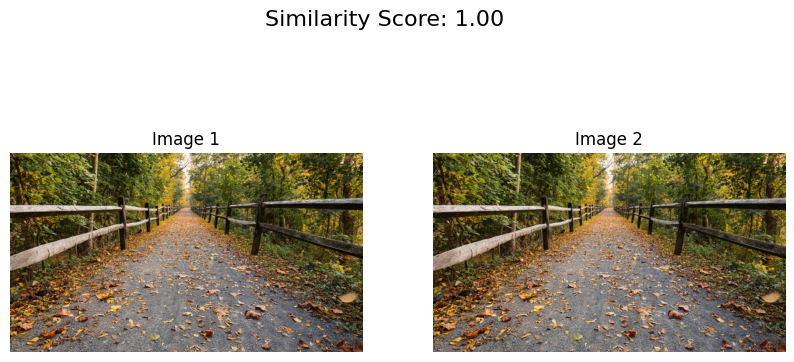

('../images/dog1.jpeg', 0.502)
Image: ../images/dog1.jpeg, Similarity Score: 0.50
../images/bridge1.jpg ../images/dog1.jpeg


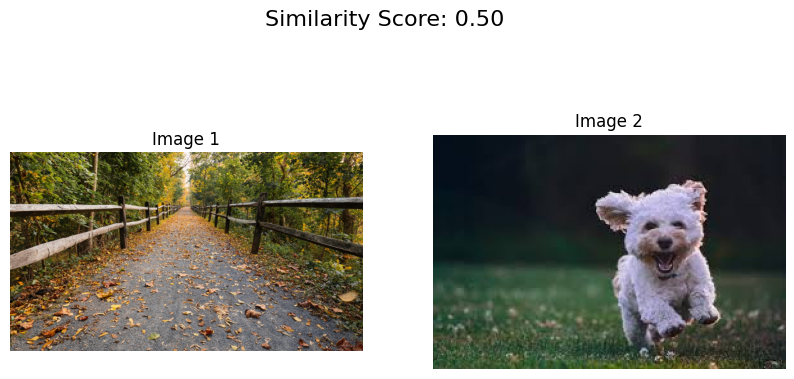

('../images/chair.jpeg', 0.45999999999999996)
Image: ../images/chair.jpeg, Similarity Score: 0.46
../images/bridge1.jpg ../images/chair.jpeg


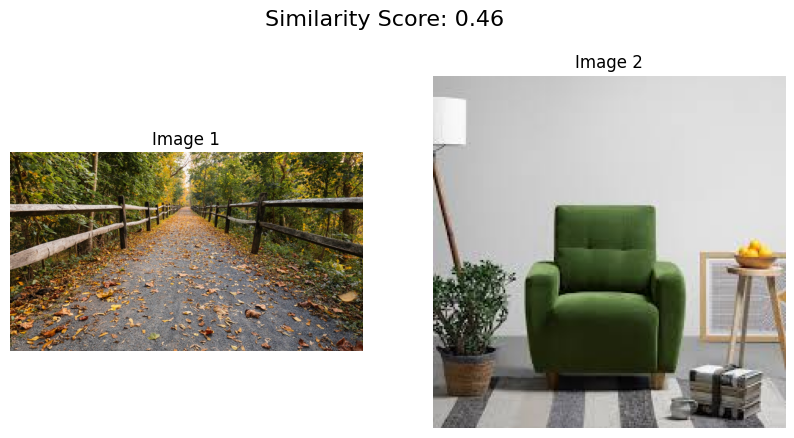

('../images/rider.jpeg', 0.45799999999999996)
Image: ../images/rider.jpeg, Similarity Score: 0.46
../images/bridge1.jpg ../images/rider.jpeg


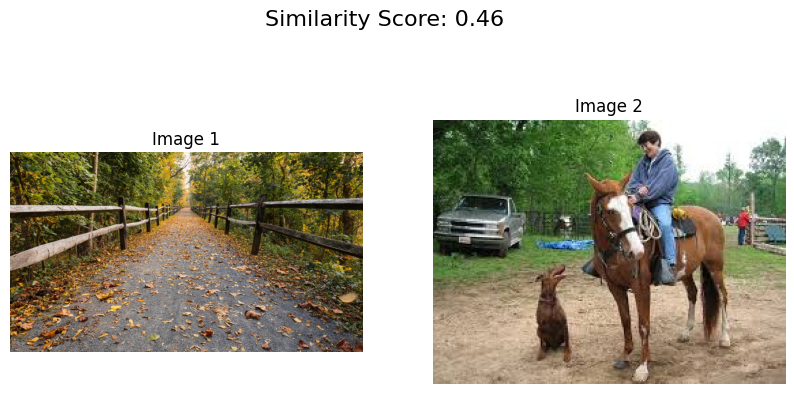

('../images/bikers.jpeg', 0.41600000000000004)
Image: ../images/bikers.jpeg, Similarity Score: 0.42
../images/bridge1.jpg ../images/bikers.jpeg


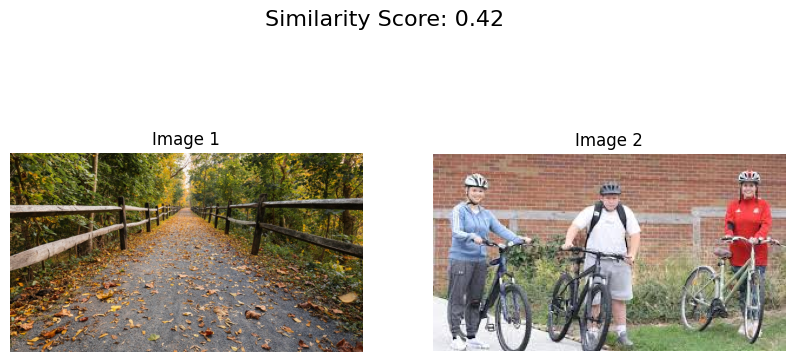

In [ ]:
def display_results(query_image_path, image_folder_path):
    results = image_similarity_search(query_image_path, image_folder_path)

    print(f"Most similar images to {query_image_path}:\n")

    for result in results:
        image_file, score = result
        print(f"Image: {image_file}, Similarity Score: {score:.2f}")
        show_images_side_by_side(query_image_path, image_file, score)

        # # Optionally display the images
        # img = cv2.imread(os.path.join(image_folder_path, image_file))
        # cv2.imshow(f"{image_file} - Similarity: {score:.2f}", img)
        # cv2.waitKey(0)  # Wait for a key press to move to the next image
        # cv2.destroyAllWindows()


query_image_path = '../images/bridge1.jpg'
image_folder_path = '../images/'  # Folder with images to search from
display_results(query_image_path, image_folder_path)
